In [1]:
import pandas as pd          
import numpy as np          # For mathematical calculations 
import matplotlib.pyplot as plt  # For plotting graphs 
import datetime   # To access datetime 
from pandas import Series        # To work on series 
import warnings                   # To ignore the warnings warnings.filterwarnings("ignore")

train=pd.read_csv("train.csv")
test=pd.read_csv("test.csv")

train.head(10)
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
datetime      10886 non-null object
season        10886 non-null int64
holiday       10886 non-null int64
workingday    10886 non-null int64
weather       10886 non-null int64
temp          10886 non-null float64
atemp         10886 non-null float64
humidity      10886 non-null int64
windspeed     10886 non-null float64
casual        10886 non-null int64
registered    10886 non-null int64
count         10886 non-null int64
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.6+ KB


In [2]:
train.apply(lambda x: len(x.unique()))
for column in train.columns:
    uniques = sorted(train[column].unique())
    print('{0:20s} {1:5d}\t'.format(column, len(uniques)), uniques[:5])

datetime             10886	 ['2011-01-01 00:00:00', '2011-01-01 01:00:00', '2011-01-01 02:00:00', '2011-01-01 03:00:00', '2011-01-01 04:00:00']
season                   4	 [1, 2, 3, 4]
holiday                  2	 [0, 1]
workingday               2	 [0, 1]
weather                  4	 [1, 2, 3, 4]
temp                    49	 [0.82, 1.64, 2.46, 3.28, 4.1]
atemp                   60	 [0.76, 1.515, 2.275, 3.03, 3.79]
humidity                89	 [0, 8, 10, 12, 13]
windspeed               28	 [0.0, 6.0032, 7.0015, 8.9981, 11.0014]
casual                 309	 [0, 1, 2, 3, 4]
registered             731	 [0, 1, 2, 3, 4]
count                  822	 [1, 2, 3, 4, 5]


Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count'],
      dtype='object')


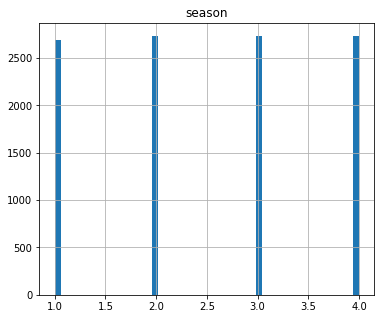

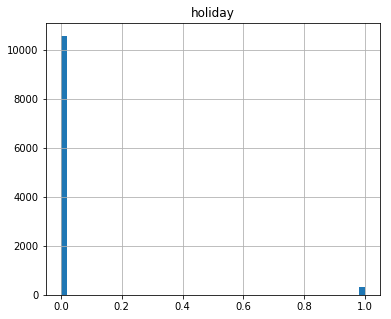

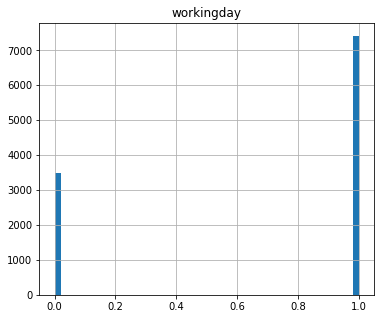

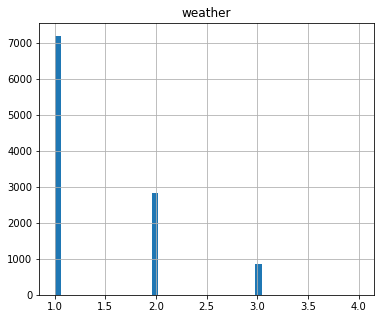

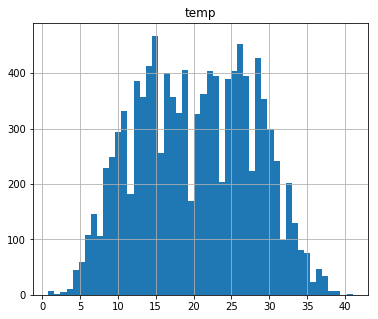

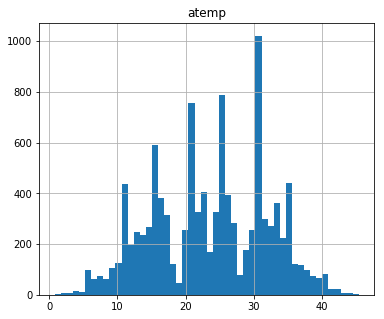

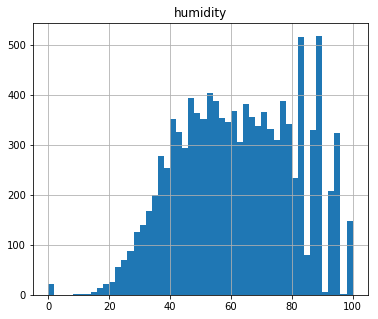

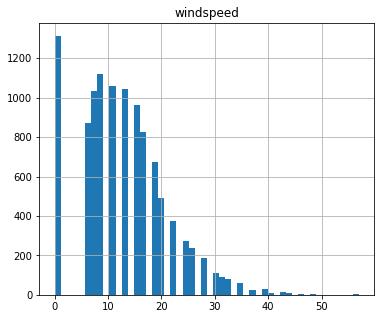

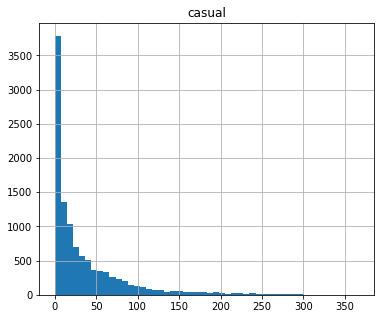

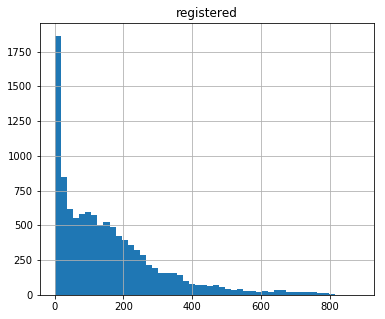

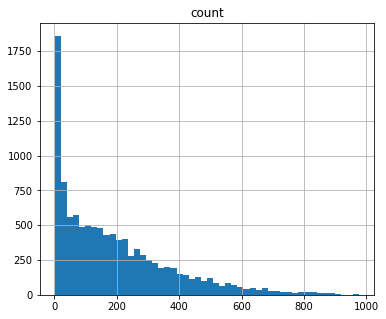

In [3]:
print(train.columns)
for col in train.columns :
    if train.dtypes[col]!='object':
        plt.figure(figsize=(6,5))
        train[col].dropna().hist(bins=50)
        plt.title(col)

plt.show()

f:\freycode\little-black-book\lib\site-packages\pandas\plotting\_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


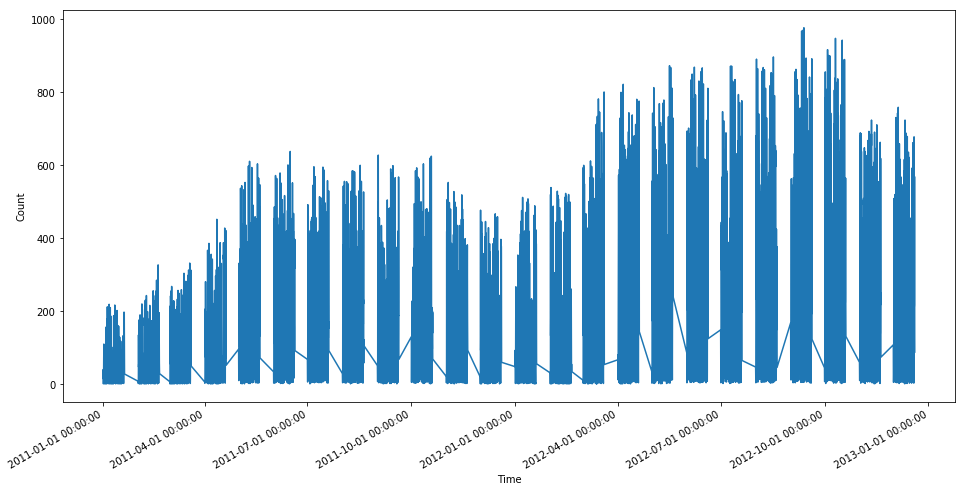

In [4]:
import matplotlib.dates as mdates

data = train.copy()
data['datetime'] = pd.to_datetime(data.datetime,format='%Y-%m-%d %H:%M:%S')
data['year']=data.datetime.dt.year 
data['month']=data.datetime.dt.month 
data['day']=data.datetime.dt.day
data['Hour']=data.datetime.dt.hour 
data['day of week']=data.datetime.dt.dayofweek

fig, ax = plt.subplots(1,figsize=(16,8)) 
fig.autofmt_xdate()
plt.plot(data['datetime'], data['count'])
plt.xlabel("Time") 
plt.ylabel("Count") 

xfmt = mdates.DateFormatter('%Y-%m-%d %H:%M:%S')
ax.xaxis.set_major_formatter(xfmt)

plt.show()

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count',
       'year', 'month', 'day', 'Hour', 'day of week'],
      dtype='object')


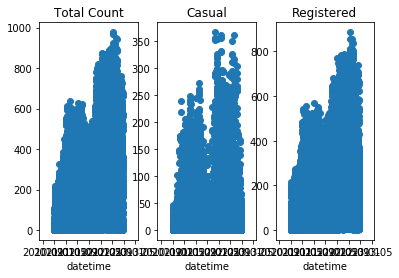

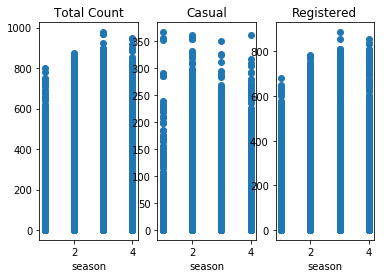

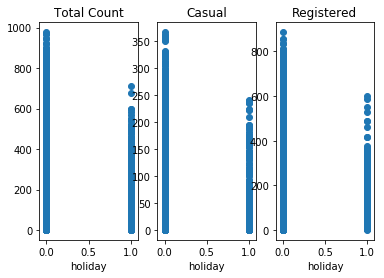

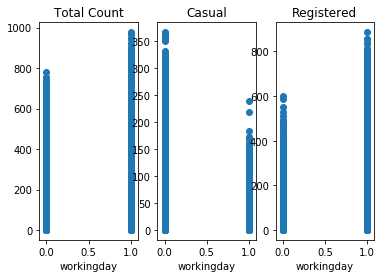

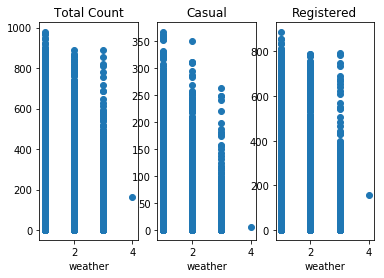

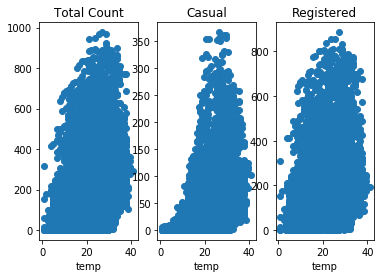

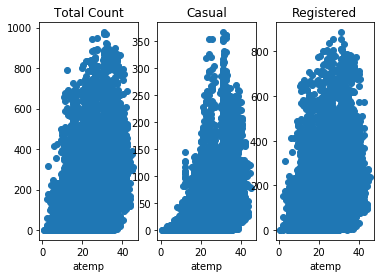

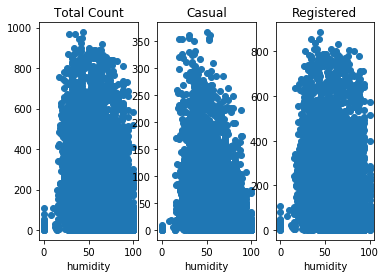

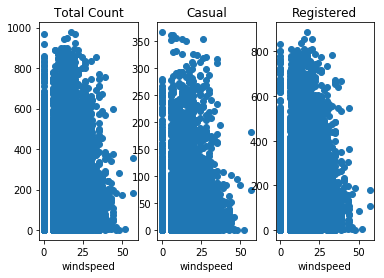

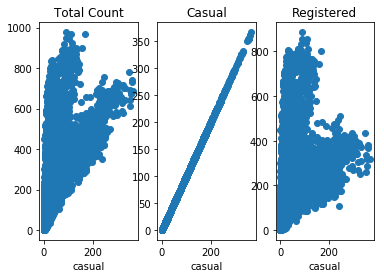

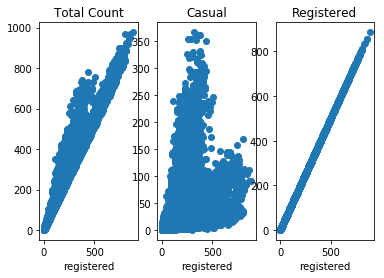

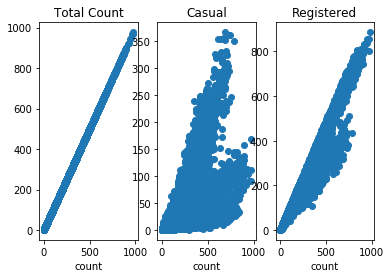

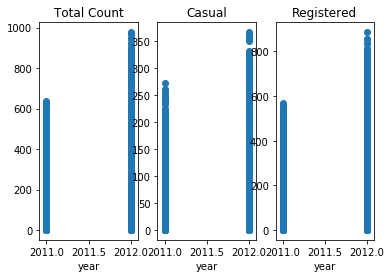

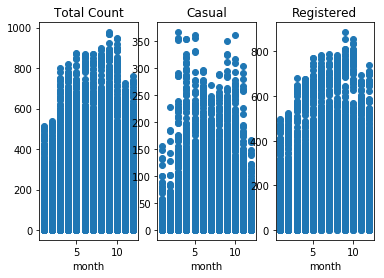

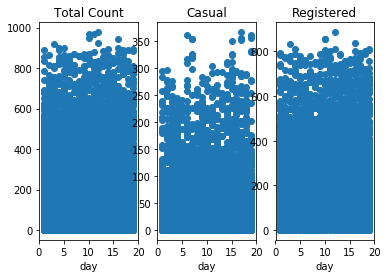

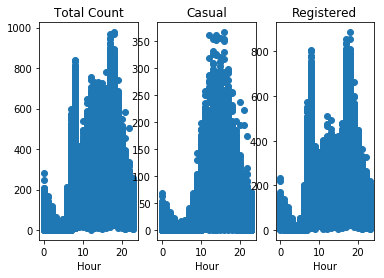

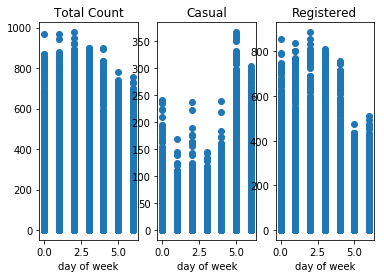

In [5]:
print(data.columns)
for col in data.columns :
    if data.dtypes[col]!='object':
        fig, ax = plt.subplots(1, 3)
        ax[0].scatter(data[col],data['count'])
        ax[0].set_xlabel(col)
        ax[0].set_title('Total Count')
        ax[1].scatter(data[col],data['casual'])
        ax[1].set_xlabel(col)
        ax[1].set_title('Casual')
        ax[2].scatter(data[col],data['registered'])
        ax[2].set_xlabel(col)
        ax[2].set_title('Registered')
        
plt.show()

In [7]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

X = data[['season', 'holiday', 'workingday', 'weather', 'temp', 'atemp', 'humidity', 'windspeed',
          'year', 'month', 'Hour', 'day of week']]
yC = data['casual']
yR = data['registered']
X_trainC, X_validC, y_trainC, y_validC = train_test_split(X, yC, test_size = 0.8, random_state = 42)
X_trainR, X_validR, y_trainR, y_validR = train_test_split(X, yR, test_size = 0.8, random_state = 42)

rfC = RandomForestRegressor(n_estimators = 100,
                           n_jobs = -1,
                           oob_score = True,
                           bootstrap = True,
                           random_state = 42)

rfR = RandomForestRegressor(n_estimators = 100,
                           n_jobs = -1,
                           oob_score = True,
                           bootstrap = True,
                           random_state = 42)
                               
print('Training random forest model (casual)...)')
rfC.fit(X_trainC, y_trainC)

print('(Casual) R^2 Training Score: {:.2f} \nOOB Score: {:.2f} \nR^2 Validation Score: {:.2f}'.format(rfC.score(X_trainC, y_trainC), 
                                                                                             rfC.oob_score_,
                                                                                             rfC.score(X_validC, y_validC)))

print('Training random forest model (registered)...)')
rfR.fit(X_trainR, y_trainR)

print('(Registered) R^2 Training Score: {:.2f} \nOOB Score: {:.2f} \nR^2 Validation Score: {:.2f}'.format(rfR.score(X_trainR, y_trainR), 
                                                                                             rfR.oob_score_,
                                                                                             rfR.score(X_validR, y_validR)))

Training random forest model (casual)...)
(Casual) R^2 Training Score: 0.98 
OOB Score: 0.87 
R^2 Validation Score: 0.87
Training random forest model (registered)...)
(Registered) R^2 Training Score: 0.99 
OOB Score: 0.93 
R^2 Validation Score: 0.92


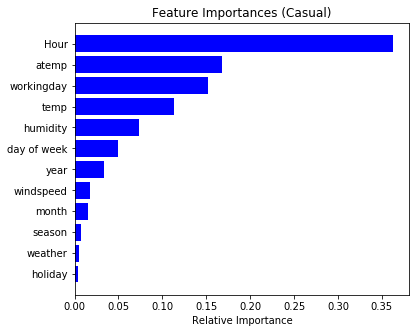

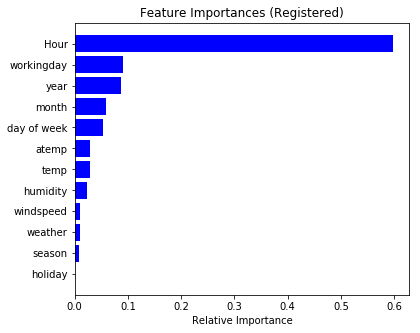

In [8]:
features=['season', 'holiday', 'workingday', 'weather', 'temp', 'atemp', 'humidity', 'windspeed',
          'year', 'month', 'Hour', 'day of week']

importancesC = rfC.feature_importances_
indicesC = np.argsort(importancesC)

# print(range(len(indicesC)))
# print(type(indicesC))
# print([features[i] for i in indicesC])

plt.figure(figsize=(6,5))
plt.title('Feature Importances (Casual)')
plt.barh(range(len(indicesC)), importancesC[indicesC], color='b', align='center')
plt.yticks(range(len(indicesC)), [features[i] for i in indicesC])
plt.xlabel('Relative Importance')

importancesR = rfR.feature_importances_
indicesR = np.argsort(importancesR)

plt.figure(figsize=(6,5))
plt.title('Feature Importances (Registered)')
plt.barh(range(len(indicesR)), importancesR[indicesR], color='b', align='center')
plt.yticks(range(len(indicesR)), [features[i] for i in indicesR])
plt.xlabel('Relative Importance')

plt.show()